<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
from google.colab import drive  
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/twitter_analysis'

Mounted at /content/gdrive


In [4]:
airline = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/airline.csv")

In [7]:
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,nonstop_documents
483,1514,1328035692849623041,2020-11-15 18:02:37,dear guest there is no flight from india to s...,2,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...
1564,3186,1311232633058340864,2020-09-30 09:13:15,hello dear how may i help you,0,False,Saudi Arabia,en,flynas,hello dear may help
1360,3220,1320689421981724673,2020-10-26 11:31:10,dear guest the flight will be resume at the f...,2,False,Saudi Arabia,en,Saudi_airlines,dear guest flight resume first november follo...
1494,2223,1317506454711078915,2020-10-17 16:43:11,hello follow us if available will be announc...,0,False,Saudi Arabia,en,flynas,hello follow u available announced thank
66,245,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flight...,1,False,Saudi Arabia,en,Saudi_airlines,hello dear guest follow flight schedule website


#Lexicon-based Approach

This approach utilizes lexicon or dictionaries. In this step semantic orientation or polarity of words or phrases in the document are used in calculating the orientation for a document.

#Create a function to get the subjectivity

Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.

In [8]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.

In [9]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [10]:
# Create two new columns 'Subjectivity' & 'Polarity'
airline['sentiment_confidence'] = airline['nonstop_documents'].apply(getSubjectivity)
airline['polarity'] = airline['nonstop_documents'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
airline.head(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,nonstop_documents,sentiment_confidence,polarity
0,5,1336728569272262663,2020-12-09 17:45:00,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...,0.9000,0.6000
1,7,1336719354537369603,2020-12-09 17:08:23,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...,0.9000,0.6000
2,9,1336711502087254018,2020-12-09 16:37:11,hello dear valued guest once the confirmation...,0,False,Saudi Arabia,en,Saudi_airlines,hello dear valued guest confirmation date lif...,0.0000,0.0000
3,14,1336705261340332032,2020-12-09 16:12:23,dear valued guest kindly review the travel gu...,0,False,Saudi Arabia,en,Saudi_airlines,dear valued guest kindly review travel guidel...,0.6375,0.2375
4,19,1336693042225483781,2020-12-09 15:23:50,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...,0.9000,0.6000


In [11]:
def getPolarityPlot(polarity, airline):
   fig, ax = plt.subplots(figsize=(8, 6))

   # Plot histogram of the polarity values
   polarity.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
                 ax=ax,
                 color="purple")

   plt.title("Sentiments from Tweets on " +airline)
   plt.show()

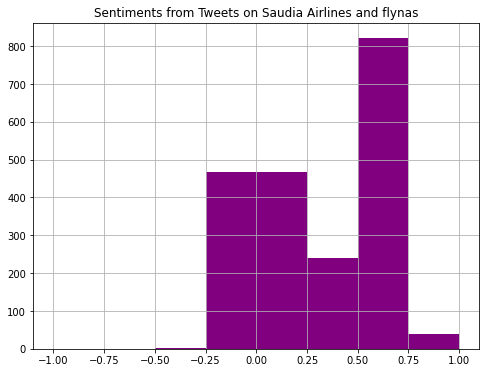

In [12]:
getPolarityPlot(airline['polarity'], "Saudia Airlines and flynas")

it is clear that the majority of tweets have positive santiment

#Classify the tweets based on polarity value 

In [13]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [14]:
airline['sentiment'] = airline['polarity'].apply(getSentiment)

In [16]:
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,nonstop_documents,sentiment_confidence,polarity,sentiment
60,198,1335620737013600263,2020-12-06 16:22:52,dear guest please review the saudia website ...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest please review saudia website fligh...,0.000000,0.000000,Neutral
193,674,1332490112324800512,2020-11-28 01:02:53,hello dear guest we hope you check and be inf...,0,False,Saudi Arabia,en,Saudi_airlines,hello dear guest hope check informed travel u...,0.375000,-0.125000,Negative
312,1031,1330245510666612739,2020-11-21 20:23:39,welcome dear guest the flights from india sti...,0,False,Saudi Arabia,en,Saudi_airlines,welcome dear guest flight india still suspend...,0.483333,0.416667,Positive
1364,3230,1320660797492789248,2020-10-26 09:37:25,dear guest kindly visit our website to check ...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest kindly visit website check travel ...,0.637500,0.237500,Positive
561,1761,1326539320895791105,2020-11-11 14:56:34,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...,0.900000,0.600000,Positive


#remove words with less frequency(Outliers)

# visualizing the seniment

In [17]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

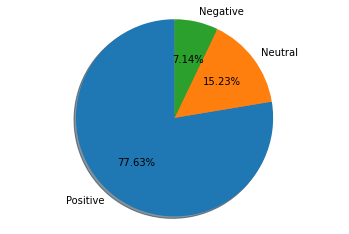

In [20]:
createPieChartFor(airline.sentiment)

# Printing positive tweets 

In [24]:
print('Printing positive tweets:\n')
j=1
sortedDF = airline.sort_values(by=['polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['nonstop_documents'][i])
    print()
    j= j+1


Printing positive tweets:

1)  dear guest flight india saudi arabia time kindly follow flight 

2)  dear guest flight india saudi arabia time kindly follow flight 

3)  dear valued guest kindly review travel guideline requirement due covid via follow 

4)  dear guest flight india saudi arabia time kindly follow flight sc 

5)  trust appreciated look forward seeing one flight soon

6)  dear guest flight india saudi arabia time kindly follow flight sc 

7)  dear guest flight india saudi arabia time kindly follow flight 

8)  dear guest flight india saudi arabia time kindly follow flight 

9)  dear guest flight india saudi arabia time kindly follow flight sc 

10)  thanks trust hope see soon one flight

11)  dear guest flight india saudi arabia time kindly follow flight sched 

12)  dear guest flight india saudi arabia time kindly follow flight 

13)  hello dear guest kindly provide u refund request number via direct message allow u help thank

14)  dear guest flight india saudi arabia ti

# Printing negative tweets 

In [25]:
 
print('Printing negative tweets:\n')
j=1
sortedDF = airline.sort_values(by=['polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['nonstop_documents'][i])
    print()
    j=j+1

Printing negative tweets:

1)  hello dear guest hope check informed travel update due corona virus covid 

2)  hello dear guest please visit travel guideline requirement due covid page 

3)  hello dear guest hope check informed travel update due corona virus covi 

4)  hello dear guest hope check informed travel update due corona virus covid 

5)  hello dear guest hope check informed travel update due corona virus cov 

6)  hello dear guest hope check informed travel update due corona virus covid 

7)  hello dear guest hope check informed travel update due corona virus covid 

8)  hello dear guest hope check informed travel update due corona virus cov 

9)  hello dear guest hope check informed travel update due corona virus covi 

10) prahlad hello dear guest hope check informed travel update due corona virus covid 

11)  hello dear guest hope check informed travel update due corona virus cov 

12)  hello dear guest hope check informed travel update due corona virus cov 

13)  hello de

#Save the data set

In [ ]:
airline.to_csv('airline_classified.csv')
!cp airline_classified.csv "./gdrive/My Drive/datasets/twitter_analysis/"